<a href="https://colab.research.google.com/github/bismahashim/Assignment/blob/main/Assignment_Clustring_AIrlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')


In [5]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
airline.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
airline.set_index('ID',inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [9]:
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [12]:
print('unique_cc1',airline.cc1_miles.unique())
print('unique_cc2',airline.cc2_miles.unique())
print('unique_cc3',airline.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [22]:
null_count_col = airline.isnull().sum().value_counts(ascending=False)
null_count_row = airline.isnull().sum(axis=1).value_counts(ascending=False)
null_percent_row = (airline.isnull().sum(axis=1) * 100 / len(airline)).value_counts(ascending=False)
null_percent_col = (airline.isnull().sum() * 100 / len(airline)).value_counts(ascending=False)

In [23]:
null_count_col

0    11
dtype: int64

In [21]:
null_percent_col

0.0    11
dtype: int64

In [24]:
null_percent_row

0.0    3999
dtype: int64

In [25]:
null_count_row

0    3999
dtype: int64

In [26]:
airline.duplicated().sum()

1

In [27]:
airline[airline.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [32]:
airline=airline.drop_duplicates()

In [33]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [35]:
airline[airline.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,


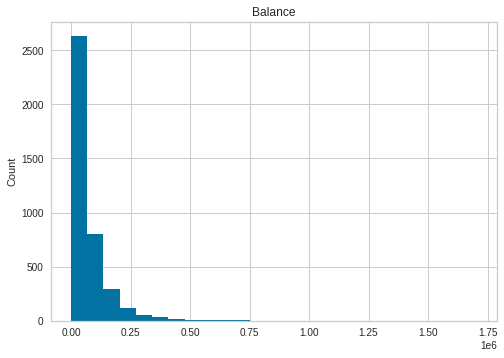

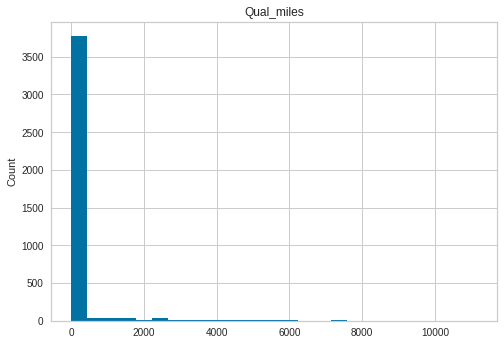

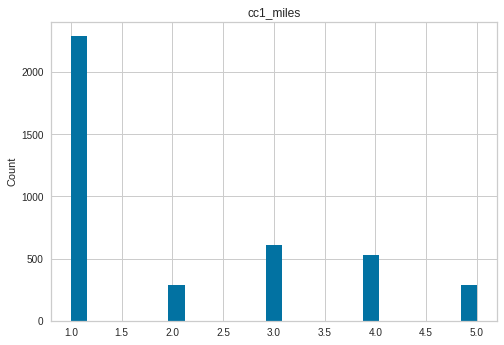

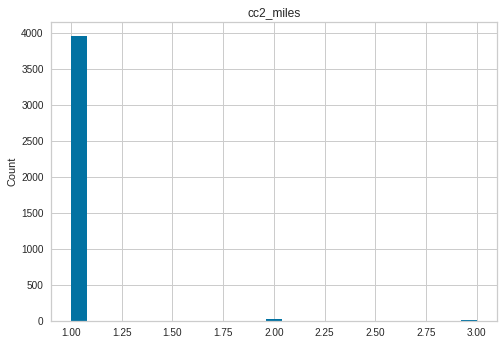

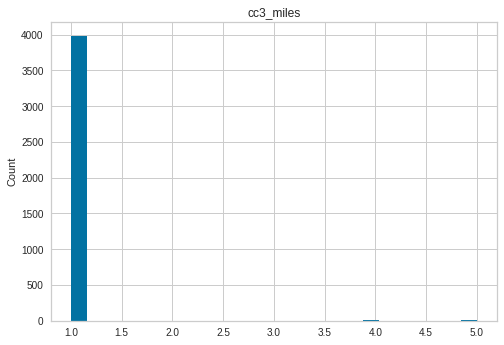

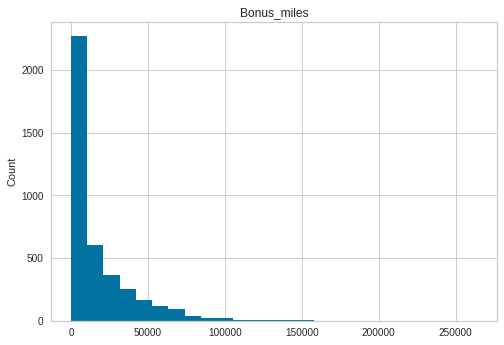

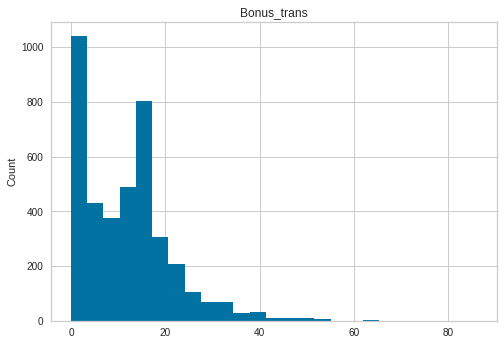

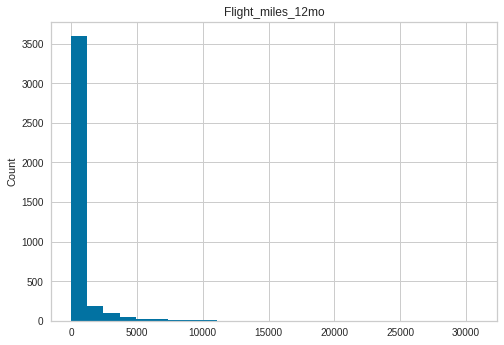

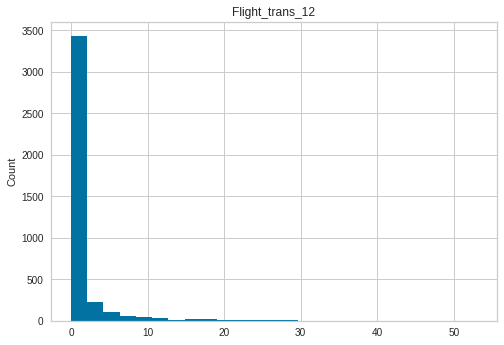

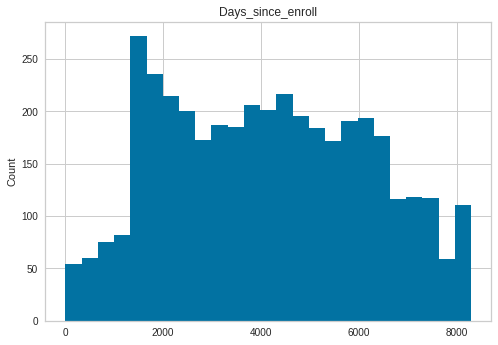

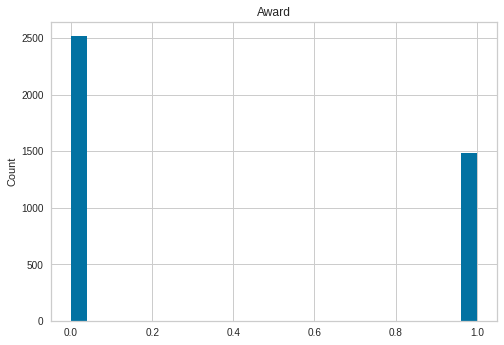

In [43]:
for feature in airline.columns:
    airline=airline.copy()
    airline[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


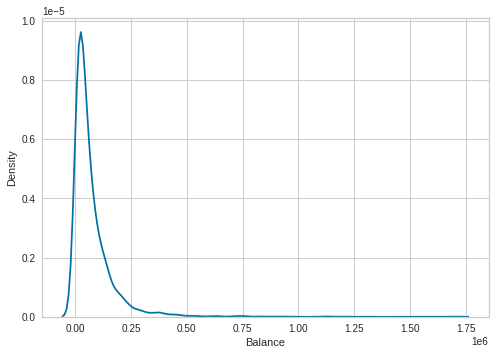

Qual_miles


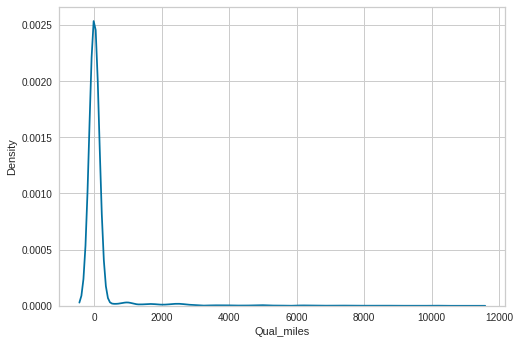

cc1_miles


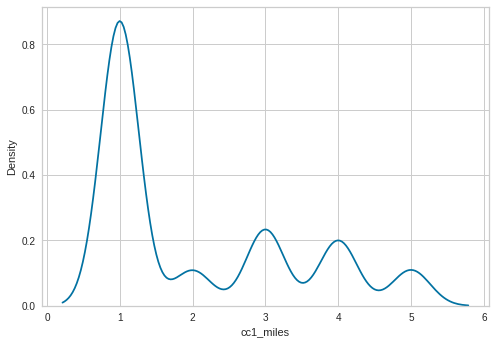

cc2_miles


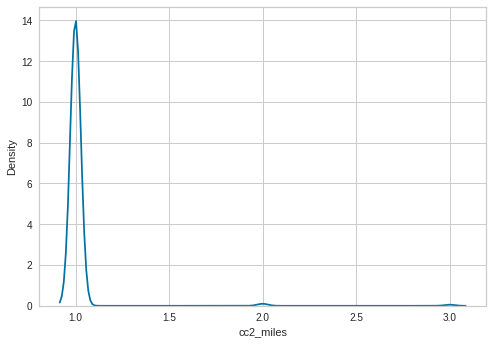

cc3_miles


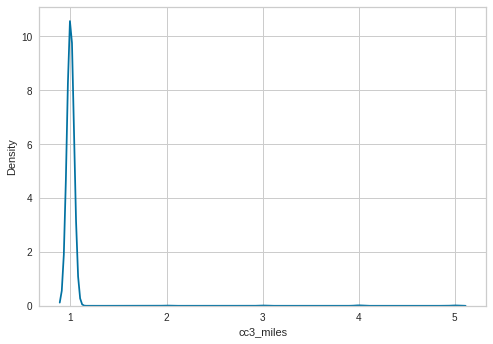

Bonus_miles


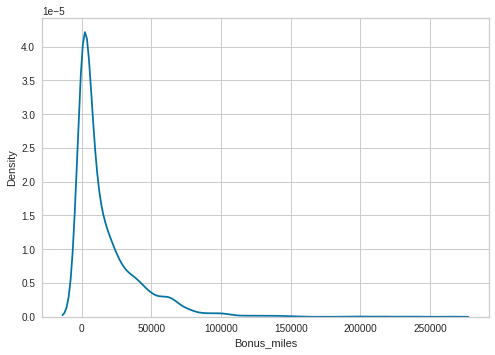

Bonus_trans


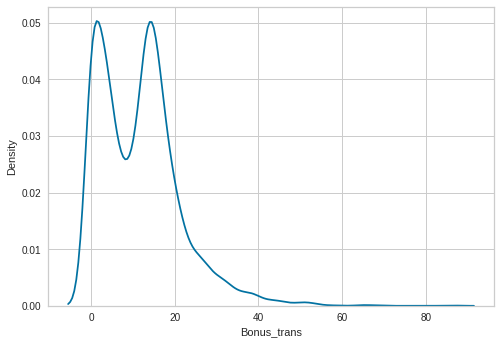

Flight_miles_12mo


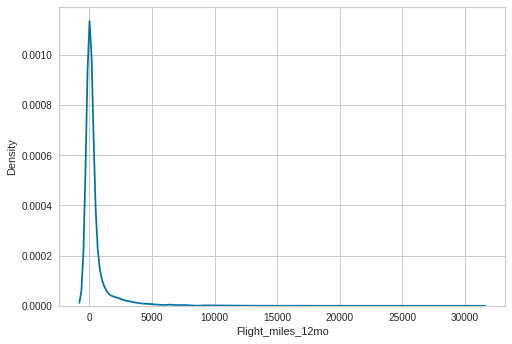

Flight_trans_12


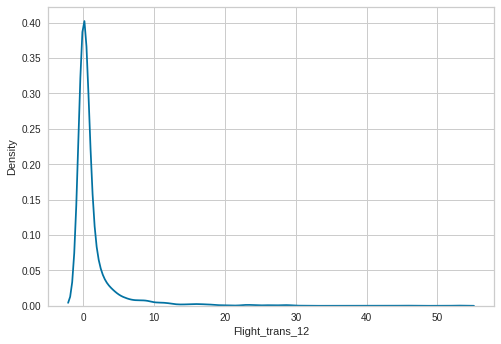

Days_since_enroll


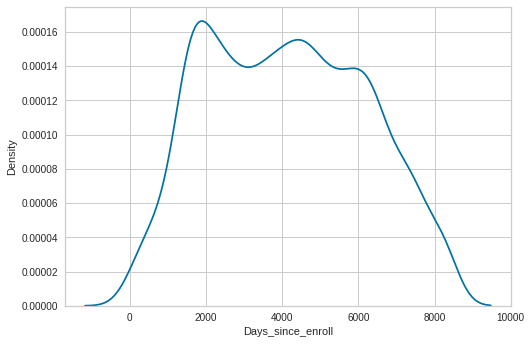

Award


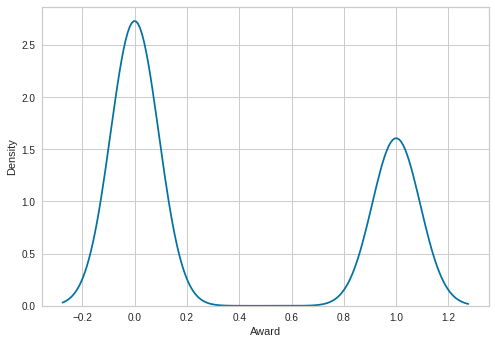

In [44]:
for n in airline.columns:
    print(n)
    sns.kdeplot(airline[n])
    plt.show()

In [45]:
airline.columns


Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [ ]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(airline.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()


In [62]:
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline)

In [63]:
scaled_airline_df

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

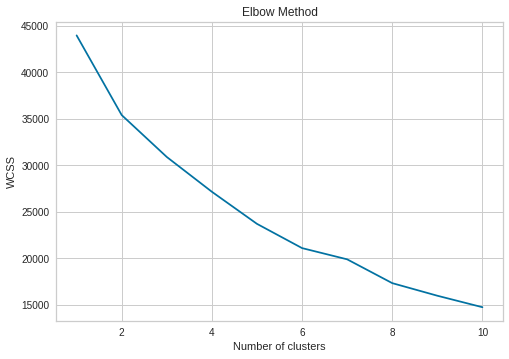

In [64]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:

from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=0)
clusters_new.fit(scaled_airline_df)

KMeans(n_clusters=6, random_state=0)

In [66]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [67]:
airline['clusterid_new'] = clusters_new.labels_

In [68]:
clusters_new.cluster_centers_

array([[ 1.13661978,  0.41416471,  0.13434996, -0.09825429, -0.06277446,
         0.6561826 ,  1.70528239,  3.77057434,  4.00160023,  0.27124922,
         0.88372079],
       [ 0.43360655, -0.11304557,  1.20989562, -0.09825429, -0.05450669,
         0.92790005,  0.75243243, -0.08073137, -0.0896464 ,  0.37051107,
         0.57831847],
       [-0.2944391 , -0.12884258, -0.6016064 , -0.09825429, -0.06072325,
        -0.51689575, -0.49353627, -0.18636708, -0.19846289, -0.19781849,
        -0.34994003],
       [-0.04706705, -0.15626333, -0.66838569,  9.03710982, -0.06277446,
        -0.1018366 ,  0.61758448,  0.08745745,  0.22023229, -0.0727739 ,
         0.0515894 ],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [ 0.45689596,  6.73023291, -0.0434189 , -0.09825429, -0.06277446,
         0.06353524,  0.06505958,  0.3595715 ,  0.39411338, -0.07153328,
         0.387

In [69]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [75]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [76]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [77]:
airline.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline.set_index('ID',inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [78]:
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [106]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [107]:
airline_norm = norm_func(airline)
airline_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_clusterid,h_clusterid,Clusters
ID,,,,,,,,,,,,,,
1,0.016508,0.0,0.0,0.0,0.0,0.00066,0.011628,0.0,0.0,0.843742,0.0,NaN,0.25,0.25
2,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0,NaN,0.25,0.25
3,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0,NaN,0.25,0.25
4,0.008667,0.0,0.0,0.0,0.0,0.001896,0.011628,0.0,0.0,0.837955,0.0,NaN,0.75,0.75
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,NaN,0.25,0.25


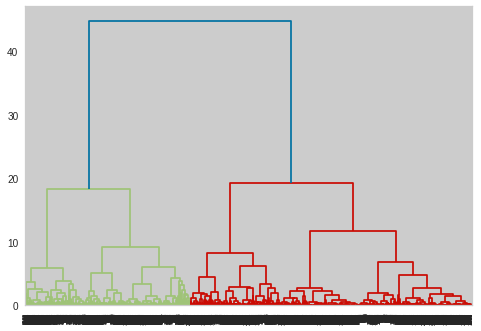

In [81]:
dendrogram = sch.dendrogram(sch.linkage(airline_norm, method='ward'))

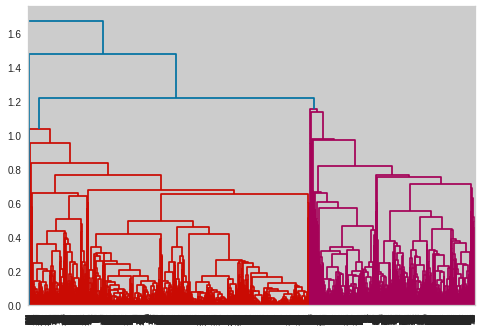

In [82]:
dendrogram = sch.dendrogram(sch.linkage(airline_norm, method='average'))

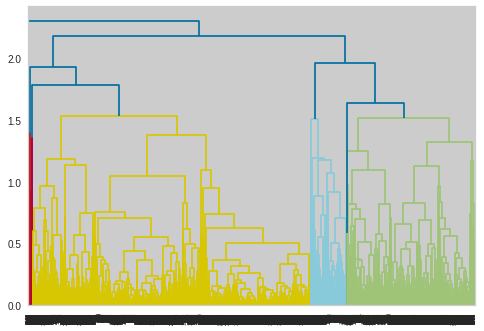

In [83]:
dendrogram = sch.dendrogram(sch.linkage(airline_norm, method='complete'))

In [108]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=5)

In [99]:
y_hc = hc.fit_predict(airline_norm)
y_hc

array([1, 1, 1, ..., 0, 4, 4])

In [100]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,3
...,...
3994,0
3995,0
3996,0
3997,4


In [111]:
Clusters.value_counts()

Clusters
1           1011
0            946
2            808
4            699
3            535
dtype: int64

In [114]:
# for DBSCAN
airline=airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [115]:
airline.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline.set_index('ID',inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [116]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [117]:
airline_norm=StandardScaler().fit_transform(airline)
airline_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [119]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline_norm)

DBSCAN(eps=1, min_samples=4)

In [120]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [121]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [122]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [123]:
airline['clusters']=dbscan.labels_
airline.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [124]:
airline.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,184694.319471,977.113422,2.763705,1.058601,1.092628,40964.655955,22.765595,2248.875236,6.516068,4754.215501,0.706994
1,0,53978.079794,5.088374,1.658945,1.000000,1.000000,9064.591163,8.487773,138.320463,0.434148,3802.836122,0.000000
2,1,62092.632969,9.785974,2.591985,1.000000,1.000000,22952.648452,12.862477,288.490893,0.913479,4511.039162,1.000000
3,2,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
4,3,202750.000000,0.000000,4.000000,1.000000,1.000000,43155.666667,20.333333,2456.666667,4.666667,4447.333333,0.000000
5,4,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000
6,5,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
7,6,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000
8,7,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000
